<a href="https://colab.research.google.com/github/sahil0987-has/spark-task/blob/main/spark_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task-2 : By The Sparks Foundation

Name : Sudhansu Sekhar Choudhury

Email ID : sudhansuchoudhury0039@gmail.com

Github Profile :https://github.com/sahil0987-has

Linkedin Profile :https://www.linkedin.com/in/sudhansu-choudhury-6a49261a4/

Here I am importing the required library for model

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

Checking for the columns

In [8]:
iris=load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

Formation of data frame

In [9]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Finding the optimum number of clusters

Before clustering the data using kmeans, we need to specify the number of clusters. In order to find the optimum number of clusters, there are various methods available like Silhouette Coefficient and the Elbow method. Here, the elbow method is used.

In [10]:
 x =  df.iloc[:, [0, 1, 2, 3]].values

In [11]:
from sklearn.cluster import KMeans
k = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    k.append(kmeans.inertia_)

Finding the elbow by plotting the curve

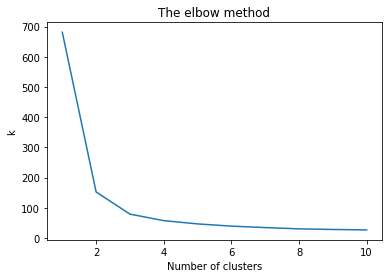

In [12]:
plt.plot(range(1, 11), k)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('k')  
plt.show()

From this we choose the number of clusters as 3.

Applying kmeans to the dataset

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

Visuallising and pploting the centroid

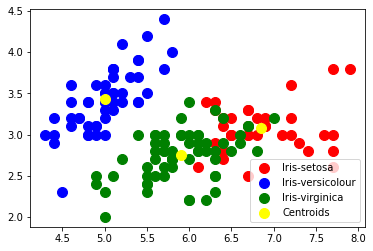

In [14]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()